In [2]:
import pandas as pd
air_data=pd.read_csv('./data/air_data.csv',encoding='utf-8')
data=air_data[['FFP_DATE','LOAD_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
data.head()

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2006/11/02,2014/03/31,1,210,580717,0.961639
1,2007/02/19,2014/03/31,7,140,293678,1.252314
2,2007/02/01,2014/03/31,11,135,283712,1.254676
3,2008/08/22,2014/03/31,97,23,281336,1.090870
4,2009/04/10,2014/03/31,5,152,309928,0.970658


In [3]:
data.describe()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,62988.000000,62988.000000,62988.000000,62988.000000
mean,176.120102,11.839414,17123.878691,0.721558
std,183.822223,14.049471,20960.844623,0.185427
min,1.000000,2.000000,368.000000,0.000000
25%,29.000000,3.000000,4747.000000,0.611997
50%,108.000000,7.000000,9994.000000,0.711856
75%,268.000000,15.000000,21271.250000,0.809476
max,731.000000,213.000000,580717.000000,1.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FFP_DATE      62988 non-null  object 
 1   LOAD_TIME     62988 non-null  object 
 2   LAST_TO_END   62988 non-null  int64  
 3   FLIGHT_COUNT  62988 non-null  int64  
 4   SEG_KM_SUM    62988 non-null  int64  
 5   avg_discount  62988 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.9+ MB


In [5]:
data.isnull().sum()

FFP_DATE        0
LOAD_TIME       0
LAST_TO_END     0
FLIGHT_COUNT    0
SEG_KM_SUM      0
avg_discount    0
dtype: int64

In [6]:
data_clean=data.copy()
data_clean.loc[0:,'FFP_DATE']=pd.to_datetime(data['FFP_DATE'])
data_clean.loc[0:,'LOAD_TIME']=pd.to_datetime(data['LOAD_TIME'])

In [ ]:
data_clean['L']=data_clean.apply(lambda x: x['LOAD_TIME']-x['FFP_DATE'] ,axis=1)
data_clean['L'].map(lambda x:x.days)
data_clean=data_clean.drop(['FFP_DATE','LOAD_TIME'],axis=1)##必须有axis=1
data_clean.columns=['R','F','M','C','L']
data_clean_norm=(data_clean-data_clean.mean())/(data_clean.std())
data_clean_norm.head(20)

In [7]:
data_clean_norm=data_clean_norm.apply(lambda x: x.astype('float64'))
data_clean_norm.describe()

,R,F,M,C,L
count,6.298800e+04,6.298800e+04,6.298800e+04,6.298800e+04,6.298800e+04
mean,-5.332850e-15,5.933323e-14,2.638082e-15,-2.758702e-14,7.850596e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.526601e-01,-7.003405e-01,-7.993895e-01,-3.891339e+00,-1.321967e+00
25%,-8.003390e-01,-6.291635e-01,-5.904761e-01,-5.908571e-01,-8.887871e-01
50%,-3.705760e-01,-3.444552e-01,-3.401523e-01,-5.231944e-02,-2.537713e-01
75%,4.998302e-01,2.249612e-01,1.978628e-01,4.741404e-01,8.191459e-01
max,3.018568e+00,1.431802e+01,2.688790e+01,4.198115e+00,2.303997e+00


Text(0.5, 0, 'x')

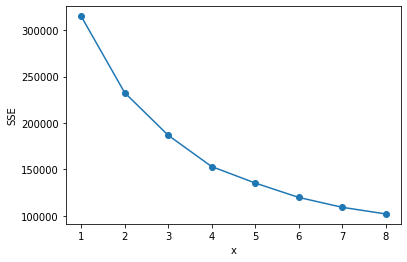

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

SSE=[]
for k in range(1,9):
    pred=KMeans(n_clusters=k,init='k-means++').fit(data_clean_norm)
    SSE.append(pred.inertia_)
x=range(1,9)
plt.plot(x,SSE,'o-')
plt.ylabel('SSE')
plt.xlabel('x')
##//用手肘法看不出最佳K值

In [9]:
import numpy as np
from sklearn.cluster import KMeans

def gap(data,nrefs=10,maxclusters=5):
    gaps=np.zeros(len(range(maxclusters+1)))
    resultdf=pd.DataFrame(columns=['clusterCount','gap'])
    for gap_index,k in enumerate(range(1,maxclusters+1)):
        refs=np.zeros(nrefs)
        for i in range(nrefs):
            pred=KMeans(n_clusters=k,init='k-means++').fit(data_clean_norm)
            refs[i]=pred.inertia_
        pred_once=KMeans(n_clusters=k,init='k-means++').fit(data_clean_norm)
        refs_once=pred_once.inertia_
        gap=np.mean(np.log(refs))-np.log(refs_once)
        resultdf=resultdf.append(pd.DataFrame({'clusterCount':[k],'gap':[gap]}),ignore_index=True)
    return resultdf['gap'].values.argmax()+1,resultdf
gap(data_clean_norm,maxclusters=15)

(14,    clusterCount           gap
 0             1  1.776357e-15
 1             2 -5.855785e-07
 2             3 -7.006170e-08
 3             4  5.292733e-09
 4             5 -1.432027e-05
 5             6  3.334448e-08
 6             7  1.858631e-06
 7             8  3.054682e-05
 8             9  5.654810e-08
 9            10  3.932295e-04
 10           11  2.283686e-06
 11           12  7.093439e-07
 12           13 -1.839201e-04
 13           14  1.296276e-03
 14           15  9.982667e-04)

In [10]:
#通过观察可发现，聚类中心为4时效果与聚类中心为14时相近，为减少运营成本，将聚类中心定为4
from sklearn.cluster import KMeans
pred=KMeans(n_clusters=4).fit(data_clean_norm)

l1=pd.DataFrame(pred.cluster_centers_)

In [11]:
l1

,0,1,2,3,4
0,-0.367694,-0.097005,-0.105840,0.097865,1.143793
1,1.638896,-0.570844,-0.535772,-0.026897,-0.316494
2,-0.415416,-0.166672,-0.167145,-0.131631,-0.693420
3,-0.804065,2.434523,2.380798,0.379923,0.480355


In [26]:
l2=pd.Series(pred.labels_).value_counts()

In [27]:
l3=pd.Series(l2.index)

In [28]:
data_clean_norm.columns

Index(['R', 'F', 'M', 'C', 'L'], dtype='object')

In [30]:
l=pd.concat([l3,l1,l2],axis=1)
l.columns=['type']+list(data_clean_norm.columns)+['type numers']
l

,type,R,F,M,C,L,type numers
0,2,-0.367694,-0.097005,-0.105840,0.097865,1.143793,17413
1,0,1.638896,-0.570844,-0.535772,-0.026897,-0.316494,13398
2,1,-0.415416,-0.166672,-0.167145,-0.131631,-0.693420,26534
3,3,-0.804065,2.434523,2.380798,0.379923,0.480355,5643
